# VIsualizations

In this notebook we will store the code that was used to produce our visualizations.

### Visualizations of monthly occuring terms
First we find the words that we want to look at over the course of a few years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
word = pd.read_csv('Data/3kplusWordMonth.csv',index_col=0)
word.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarg,aarhus,...,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre,——,———,„„„
1798-02-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-04-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
word = word.groupby(word.index,level=0).agg(sum)

In [3]:
word.index = pd.to_datetime(word.index)
yearIndex = word.index
#normalization
wordNorm = word.divide(word.sum(axis=1).values,axis=0)

Now let's search for Words that are interesting to look at. We want to look at the appearance of the word over the course of a few years to take a good look at the monthly periodicity.

In [4]:
wordNorm.shape

(2351, 43051)

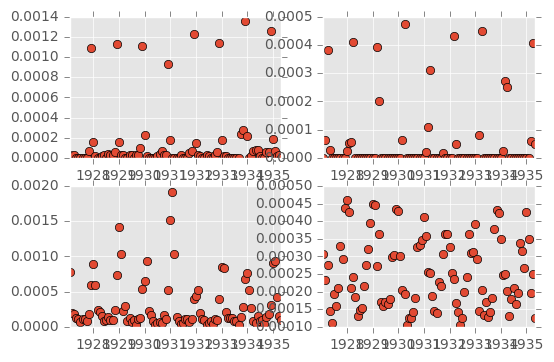

In [4]:
start = 1500
finish = 1600
plt.subplot(2,2,1)
plt.plot_date(yearIndex[start:finish],wordNorm['noële'].values[1500:1600])
plt.subplot(2,2,2)
plt.plot_date(yearIndex[start:finish],wordNorm['pâque'].values[1500:1600])
plt.subplot(2,2,3)
plt.plot_date(yearIndex[start:finish],wordNorm['neiger'].values[1500:1600])
plt.subplot(2,2,4)
plt.plot_date(yearIndex[start:finish],wordNorm['hiver'].values[1500:1600])

Initializing Plotly

In [5]:
import plotly 
plotly.tools.set_credentials_file(username='Project_ADA', api_key='LpR6Vg0wCSbJcSvQEnF3')

Plotting the monthly periodic words.

In [16]:
import plotly.plotly as py
from plotly.graph_objs import *

xValues = yearIndex[start:finish]
christmas = wordNorm['noële'].values[start:finish]
easter = wordNorm['pâque'].values[start:finish]
spring = wordNorm['neiger'].values[start:finish]
winter = wordNorm['hiver'].values[start:finish]

trace1 = Scatter(
    x=xValues, y=christmas,
    line=Line(
        color='#FFD700',
        width=3
    ),
    name='Noël'
)

trace2 = Scatter(
    x=xValues, y=easter,
    line=Line(
        color='#C0C0C0',
        width=3
    ),
    name='Pâques'
)

trace3 = Scatter(
    x=xValues, y=spring,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='Printemps'
)

trace4 = Scatter(
    x=xValues, y=winter,
    line=Line(
        color='#000000',
        width=4
    ),
    name='Hiver'
)

data = Data([trace1, trace2, trace3, trace4])
layout = Layout(
    title='Word Frequency of words that have a monthly periodicity',
    updatemenus=list([
        dict(
            x=-0.1,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True, True, True, True]],
                    label='All',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True, False, False, False]],
                    label='Noël',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, True, False, False]],
                    label='Pâques',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, True, False]],
                    label='Neige',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, True]],
                    label='Hiver',
                    method='restyle'
                )
            ]),
        )
    ]),
)
fig = Figure(data=data, layout=layout)
py.iplot(fig,filename = 'MonthlyWordFreq')

### Number of words per month

In [5]:
wordSum = word.sum(axis=1).values


/Users/thomas/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


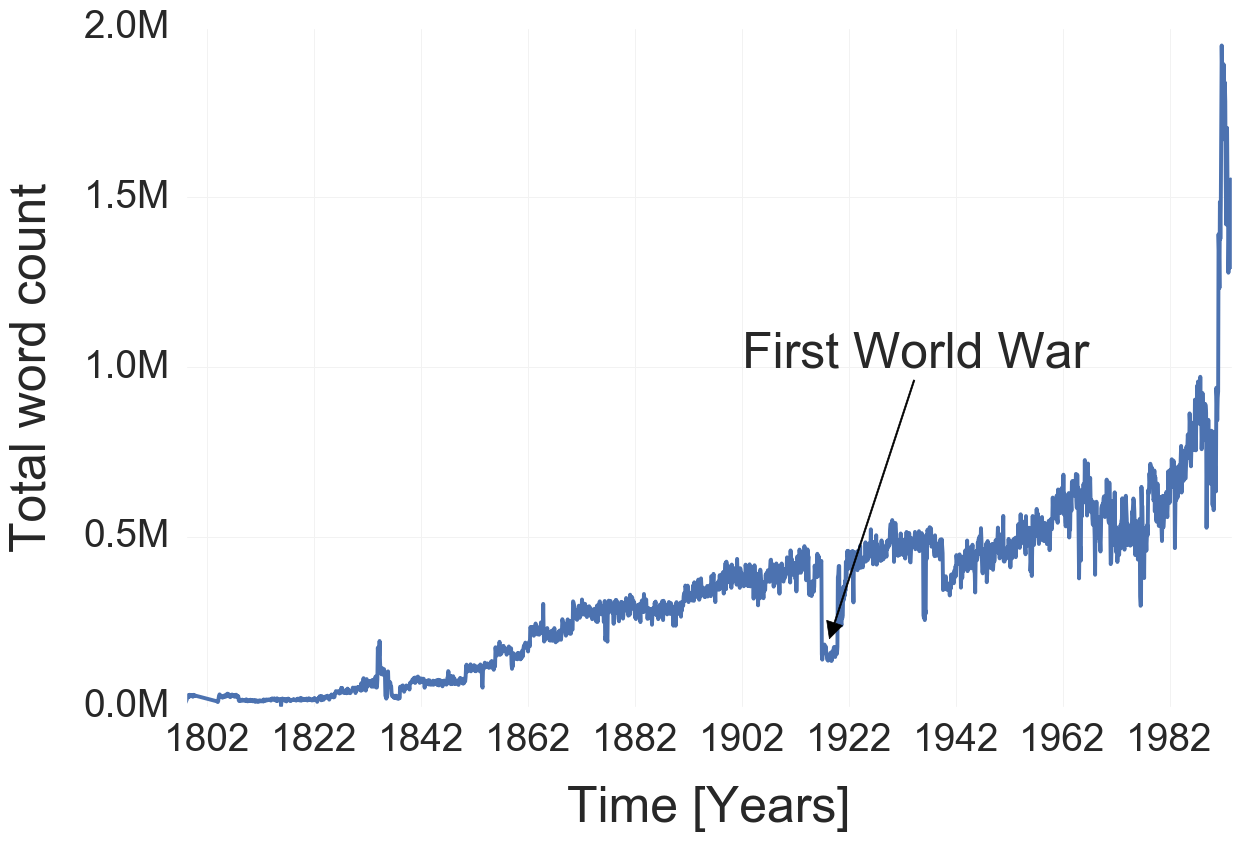

In [29]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
f, ax = plt.subplots()
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)
csfont = {'fontname':'Arial'}
hfont = {'fontname':'Arial'}
formatter = FuncFormatter(millions)
sns.set_style("whitegrid",{'grid.color': '0.95','grid.linewidth': 0.01})
sns.set_context("poster")
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['figure.autolayout'] =  True
plt.plot_date(yearIndex[:-50],wordSum[:-50],'-')
ax.yaxis.set_major_formatter(formatter)
plt.rc('axes',edgecolor='white')
plt.tick_params(axis='both', which='major', labelsize=28)
ax.annotate('First World War', xy=('1918-06-01', 200000), xytext=('1902-01-01', 1000000),
            arrowprops=dict(facecolor='black', shrink=1,width=1),fontsize=36
            )
ax.set_xlabel('Time [Years]',fontsize=36,labelpad=20,**hfont)
ax.set_ylabel('Total word count',fontsize=36,labelpad=20,**hfont)
plt.savefig('Plots/WordCountYear.png')

## Distribution of the word Frequency

(0, 3000)

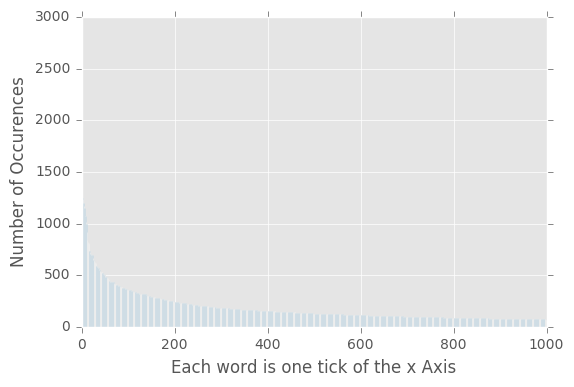

In [47]:
width = 0.7
totWords = 1000
numWords =len(word.loc[yearIndex[1000]].sort_values(ascending=False).index[0:totWords])
plt.bar(np.arange(numWords),
        word.loc[yearIndex[1000]].sort_values(ascending=False).values[0:totWords],width)
plt.ylabel('Number of Occurences')
plt.xlabel('Each word is one tick of the x Axis')
plt.ylim([0,3000])

In [48]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=word.loc[yearIndex[1000]].sort_values(ascending=False).index[0:totWords],
            y=word.loc[yearIndex[1000]].sort_values(ascending=False).values[0:totWords]
    )]

layoutwordfreq = Layout(
    title='Distribution of word count')
fig = Figure(data=data, layout=layoutwordfreq)
py.iplot(fig, filename='wordDistribution',show_link=False)

## Plotting minimum word count


In [31]:
df =pd.read_csv('Data/minNumWordsYear.csv',index_col=0)
df.head()

,Remaining distrib,Date,Minimum Num Words
0,0.041645,1798-01-01,1.0
1,0.056723,1799-01-01,2.0
2,0.041645,1804-01-01,1.0
3,0.056723,1805-01-01,2.0
4,0.056723,1806-01-01,2.0


/Users/thomas/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


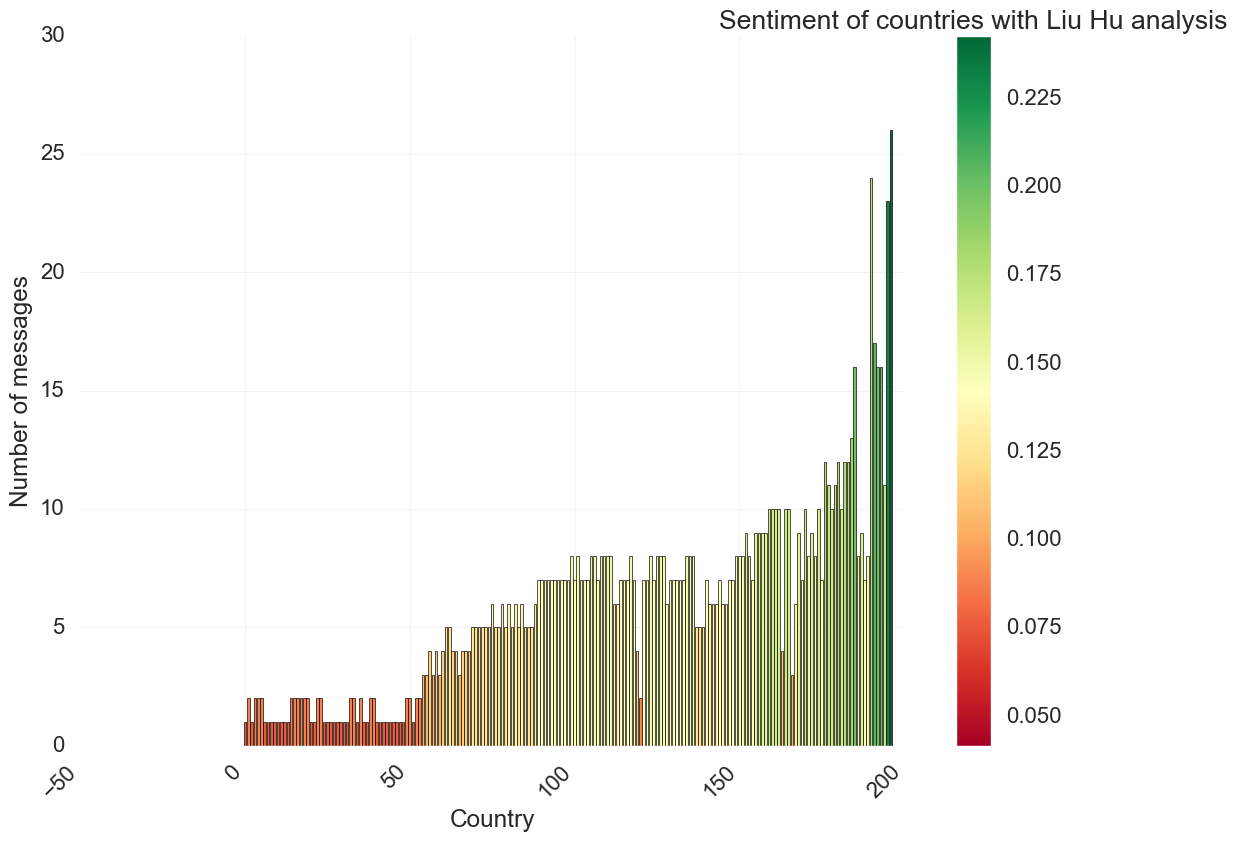

In [35]:
from matplotlib import cm

# Set up colors : red to green
y = np.array(df['Remaining distrib'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment of countries with Liu Hu analysis")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(range(df.shape[0]), df['Minimum Num Words'], align='center', color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Number of messages")
plt.show()

## Word Clouds
We propose to implement a wordcloud video, where we compute one word cloud per time point, and then we create a video from all the different word clouds, that will illustrate the evolution of the word set over time.

We also implement a smoothing on the data so that the wordcloud is a little bit more constant. If the time series have to many up and downs the resulting word cloud will make no sense. We tried to do the word cloud per month, but it was too variable. We choose here to measure the counts per year, and then smooth the time series (rolling mean).

In [28]:
wordYear = pd.read_csv('Data/3kPluswordPerYear.csv',index_col=0)
wordYear = wordYear.rolling(window=10,center=True).mean()
wordYear.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarcorp,aarg,...,œcuménique,œcuménisme,œdipe,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre
1798-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1799-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1805-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1806-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
words = wordYear.columns.astype(str)
numWords = wordYear.loc[word.index[100]].values
numWords2 = wordYear.loc[word.index[101]].values

In [11]:
listWords = []
listWords2 = []
for counter,i in enumerate(words):
    listWords.append(str(str(i)+' ')*numWords[counter])
    listWords2.append(str(str(i)+' ')*numWords2[counter])

/Users/thomas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/thomas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [12]:
test = ' '.join(listWords)
test2 = ' '.join(listWords2)

In [13]:
from wordcloud import WordCloud

In [14]:
wordcloud = WordCloud().generate(test)
wordcloud2 = WordCloud().generate(test2)

We first show the two word clouds that were computed separately.

(-0.5, 399.5, 199.5, -0.5)

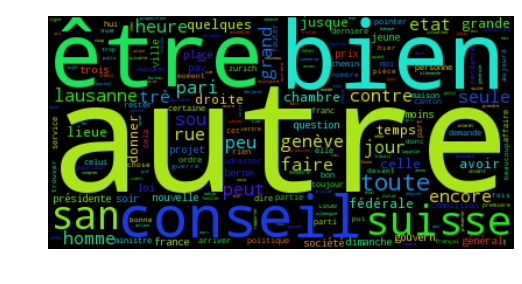

In [15]:
plt.imshow(wordcloud)
plt.axis("off")

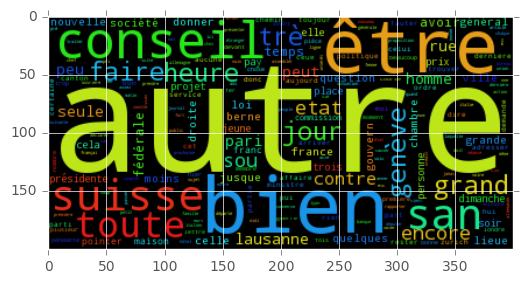

In [16]:
plt.imshow(wordcloud2)

What can be seen here is that the same word does not have the same color, and the same words appear at different places on the word cloud. Therefore we have to keep the position of the words in the first word cloud and add them to the other word cloud.

In [17]:
for i in range(len(wordcloud2.layout_)):
    word = wordcloud2.layout_[i][0][0]
    for j in range(len(wordcloud.layout_)):
        otherWord = wordcloud.layout_[j][0][0]
        if otherWord == word:
            wordcloud2.layout_[i] = list(wordcloud2.layout_[i])
            wordcloud2.layout_[i][2:] = list(wordcloud.layout_[j][2:])
            wordcloud2.layout_[i] = tuple(wordcloud2.layout_[i])
            break

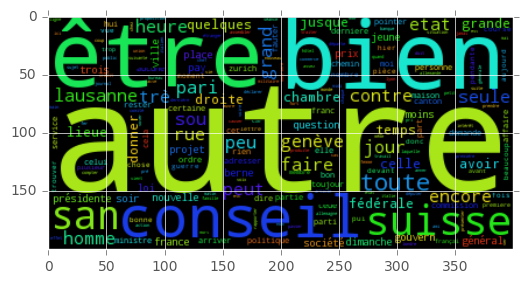

In [18]:
plt.imshow(wordcloud)

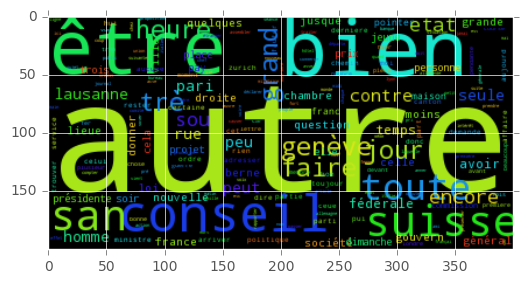

In [19]:
plt.imshow(wordcloud2)

We can see that the words have the same color and same position, but the overlap. We also see that there are a lot of empty spaces. This is due to the fact that the time series of a word is extremely noisy and therefore there is no smooth transition between two consecutive timepoints. To be able to generate a nice video that makes sense we will have to smooth out the data, and maybe have a resolution at the year level and not the month level.

### Plotting word ranks over time

We are also interested in the evolution of the ranking of the word and its evolution over time (which 10 words are most present in 1850, in 1900 etc...).


In [29]:
wordYear.index = pd.to_datetime(wordYear.index)
yearIndex = wordYear.index

In [40]:
rankYear = wordYear.loc[wordYear.index[10]].sort_values(ascending=False)

In [60]:
wordRank = rankYear.index.values
numRank = np.arange(1,len(wordRank)+1)

In [62]:
pd.DataFrame(data=numRank, index=wordRank, columns=['1881']).head()

,1881
eft,1
être,2
général,3
heure,4
toute,5


And we should be doing that for each year.

In [96]:
rankList = []

for i in range(10,len(yearIndex)):
    rankYear = wordYear.loc[wordYear.index[i]]\
    .sort_values(ascending=False)
    wordRank = rankYear.index.values
    numRank = np.arange(1,len(wordRank)+1)
    rankDF = pd.DataFrame(data=numRank,
                          index=wordRank, 
                          columns=[wordYear.index[i]])
    rankList.append(rankDF)

In [97]:
rankAll = pd.concat(rankList,axis=1)

In [98]:
rankAll.head()

,1812-01-01 00:00:00,1813-01-01 00:00:00,1814-01-01 00:00:00,1815-01-01 00:00:00,1816-01-01 00:00:00,1817-01-01 00:00:00,1818-01-01 00:00:00,1819-01-01 00:00:00,1820-01-01 00:00:00,1821-01-01 00:00:00,...,1989-01-01 00:00:00,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00
-a,7385,6917,7088,7777,8019,11224,14975,14813,14742,14596,...,45149,45149,45149,45149,45149,45149,1,1,1,1
-la,5982,5780,5945,6954,7599,9040,13740,25256,25201,25068,...,20977,20955,20403,23793,19200,19151,2,2,2,2
-le,2249,2285,2473,2798,3283,4198,5759,11482,13163,13420,...,20976,20951,20784,23794,18904,19143,3,3,3,3
-on,4748,5187,5258,5393,5571,6333,10696,25257,25202,25069,...,20975,20950,20795,23795,19436,19142,4,4,4,4
-—,6136,6097,5844,7594,15778,24339,25380,25258,25203,25070,...,16080,16390,16288,16055,15893,15447,5,5,5,5


In [99]:
rankAll.shape

(45149, 187)

In [111]:
wordsOften = ((rankAll<100).sum(axis=1) > 170).values

In [112]:
len(rankAll.index[wordsOften])

35

In [113]:
lessWord = rankAll.loc[wordsOften]

In [115]:
lessWord.head()

,1812-01-01 00:00:00,1813-01-01 00:00:00,1814-01-01 00:00:00,1815-01-01 00:00:00,1816-01-01 00:00:00,1817-01-01 00:00:00,1818-01-01 00:00:00,1819-01-01 00:00:00,1820-01-01 00:00:00,1821-01-01 00:00:00,...,1989-01-01 00:00:00,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00
affaire,161,168,155,151,139,129,111,104,96,80,...,45,43,44,45,46,49,623,623,623,623
autre,66,64,63,62,58,57,56,49,46,44,...,37,37,38,38,39,37,3149,3149,3149,3149
autres,34,33,36,36,34,36,38,35,30,28,...,16,17,17,18,18,22,3152,3152,3152,3152
avoir,22,24,22,20,19,18,17,17,17,17,...,59,60,59,59,57,58,3307,3307,3307,3307
bien,93,88,81,69,65,62,59,52,44,40,...,9,8,8,9,7,7,4502,4502,4502,4502


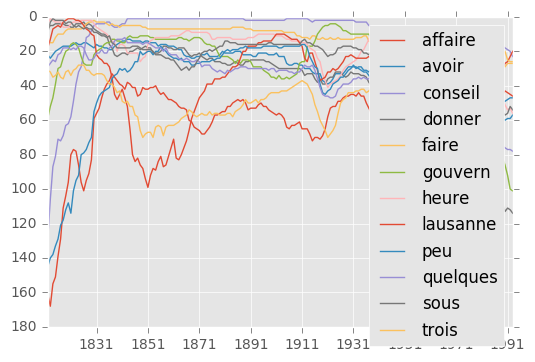

In [132]:
indexPlot = pd.to_datetime(lessWord.columns)
for i in np.arange(0,len(lessWord),3):
    plt.plot_date(indexPlot[:-5],
                  lessWord.loc[lessWord.index[i]].values[:-5],'-',
                  label=lessWord.index[i]
                  )
plt.gca().invert_yaxis()
plt.legend()

In [124]:
lessWord.index[1]

'autre'